<a href="https://colab.research.google.com/github/aa4636/DNA-Sequencing-using-Machine-Learning/blob/main/DNA_Sequencing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
human_data = pd.read_table('human_data.txt')
human_data.head()

,sequence,class
0,ATGCCCCAACTAAATACTACCGTATGGCCCACCATAATTACCCCCA...,4
1,ATGAACGAAAATCTGTTCGCTTCATTCATTGCCCCCACAATCCTAG...,4
2,ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...,3
3,ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...,3
4,ATGCAACAGCATTTTGAATTTGAATACCAGACCAAAGTGGATGGTG...,3


In [ ]:
chimp_data = pd.read_table('chimp_data.txt')
chimp_data.head()

,sequence,class
0,ATGCCCCAACTAAATACCGCCGTATGACCCACCATAATTACCCCCA...,4
1,ATGAACGAAAATCTATTCGCTTCATTCGCTGCCCCCACAATCCTAG...,4
2,ATGGCCTCGCGCTGGTGGCGGTGGCGACGCGGCTGCTCCTGGAGGC...,4
3,ATGGCCTCGCGCTGGTGGCGGTGGCGACGCGGCTGCTCCTGGAGGC...,4
4,ATGGGCAGCGCCAGCCCGGGTCTGAGCAGCGTGTCCCCCAGCCACC...,6


In [ ]:
dog_data = pd.read_table('dog_data.txt')
dog_data.head()

,sequence,class
0,ATGCCACAGCTAGATACATCCACCTGATTTATTATAATCTTTTCAA...,4
1,ATGAACGAAAATCTATTCGCTTCTTTCGCTGCCCCCTCAATAATAG...,4
2,ATGGAAACACCCTTCTACGGCGATGAGGCGCTGAGCGGCCTGGGCG...,6
3,ATGTGCACTAAAATGGAACAGCCCTTCTACCACGACGACTCATACG...,6
4,ATGAGCCGGCAGCTAAACAGAAGCCAGAACTGCTCCTTCAGTGACG...,0


In [ ]:
lizard_data = pd.read_table('lizard_data.txt')
lizard_data.head()

,sequence,class
0,ATGCCGTAGTCGATTGCGTACCGTTGTGACCTGATGCAAGTCGCTG...,8
1,ATGAGTACGTCGACTACGGTCGTAGTTGACTGCCGGTACTGCTGAC...,9
2,ATGCGTGGTACTGCGTACTCGACTGTGACGCGTTACTGATGGGCTG...,10
3,ATGACTGCCGTCGACTGCGTACGGTACGCTGACTGCTGACCGTGAC...,7
4,ATGACTGGTACTGCGACGTACTGGTACGTCGGTACTCGATGGTACT...,8


In [ ]:
# function to convert sequence strings into k-mer words, default size = 6 (hexamer words)
def getKmers(sequence, size=6):
    return [sequence[x:x+size].lower() for x in range(len(sequence) - size + 1)]

In [ ]:
human_data['words'] = human_data.apply(lambda x: getKmers(x['sequence']), axis=1)
human_data = human_data.drop('sequence', axis=1)
chimp_data['words'] = chimp_data.apply(lambda x: getKmers(x['sequence']), axis=1)
chimp_data = chimp_data.drop('sequence', axis=1)
dog_data['words'] = dog_data.apply(lambda x: getKmers(x['sequence']), axis=1)
dog_data = dog_data.drop('sequence', axis=1)
lizard_data['words'] = lizard_data.apply(lambda x: getKmers(x['sequence']), axis=1)
lizard_data = lizard_data.drop('sequence', axis=1)

In [ ]:
human_data.head()

,class,words
0,4,"[atgccc, tgcccc, gcccca, ccccaa, cccaac, ccaac..."
1,4,"[atgaac, tgaacg, gaacga, aacgaa, acgaaa, cgaaa..."
2,3,"[atgtgt, tgtgtg, gtgtgg, tgtggc, gtggca, tggca..."
3,3,"[atgtgt, tgtgtg, gtgtgg, tgtggc, gtggca, tggca..."
4,3,"[atgcaa, tgcaac, gcaaca, caacag, aacagc, acagc..."


In [ ]:
human_texts = list(human_data['words'])
for item in range(len(human_texts)):
    human_texts[item] = ' '.join(human_texts[item])
y_data = human_data.iloc[:, 0].values

In [ ]:
print(human_texts[2])

atgtgt tgtgtg gtgtgg tgtggc gtggca tggcat ggcatt gcattt catttg atttgg tttggg ttgggc tgggcg gggcgc ggcgct gcgctg cgctgt gctgtt ctgttt tgtttg gtttgg tttggc ttggca tggcag ggcagt gcagtg cagtga agtgat gtgatg tgatga gatgat atgatt tgattg gattgc attgcc ttgcct tgcctt gccttt cctttc ctttct tttctg ttctgt tctgtt ctgttc tgttca gttcag ttcagt tcagtg cagtgt agtgtc gtgtct tgtctg gtctga tctgag ctgagt tgagtg gagtgc agtgct gtgcta tgctat gctatg ctatga tatgaa atgaag tgaaga gaagat aagatt agattg gattgc attgca ttgcac tgcaca gcacac cacaca acacag cacaga acagag cagagg agaggt gaggtc aggtcc ggtcca gtccag tccaga ccagat cagatg agatgc gatgca atgcat tgcatt gcattc cattcc attccg ttccgt tccgtt ccgttt cgtttt gttttg ttttga tttgag ttgaga tgagaa gagaat agaatg gaatgt aatgtc atgtca tgtcaa gtcaat tcaatg caatgg aatgga atggat tggata ggatac gataca atacac tacacc acacca caccaa accaac ccaact caactg aactgc actgct ctgctg tgctgc gctgct ctgctt tgcttt gctttg ctttgg tttgga ttggat tggatt ggattt gatttc atttca tttcac ttcacc tcaccg caccgg accggt

In [ ]:
print(y_data)

[4 4 3 ... 6 6 6]


In [ ]:
chimp_data.head()

,class,words
0,4,"[atgccc, tgcccc, gcccca, ccccaa, cccaac, ccaac..."
1,4,"[atgaac, tgaacg, gaacga, aacgaa, acgaaa, cgaaa..."
2,4,"[atggcc, tggcct, ggcctc, gcctcg, cctcgc, ctcgc..."
3,4,"[atggcc, tggcct, ggcctc, gcctcg, cctcgc, ctcgc..."
4,6,"[atgggc, tgggca, gggcag, ggcagc, gcagcg, cagcg..."


In [ ]:
chimp_texts = list(chimp_data['words'])
for item in range(len(chimp_texts)):
    chimp_texts[item] = ' '.join(chimp_texts[item])
y_chimp = chimp_data.iloc[:, 0].values

In [ ]:
print(chimp_texts[2])

atggcc tggcct ggcctc gcctcg cctcgc ctcgcg tcgcgc cgcgct gcgctg cgctgg gctggt ctggtg tggtgg ggtggc gtggcg tggcgg ggcggt gcggtg cggtgg ggtggc gtggcg tggcga ggcgac gcgacg cgacgc gacgcg acgcgg cgcggc gcggct cggctg ggctgc gctgct ctgctc tgctcc gctcct ctcctg tcctgg cctgga ctggag tggagg ggaggc gaggcc aggccg ggccgg gccggc ccggcg cggcgg ggcggc gcggcg cggcgc ggcgcg gcgcgg cgcgga gcggag cggagc ggagct gagctc agctcc gctccg ctccgg tccggg ccgggc cgggcc gggccc ggcccg gcccgg cccggc ccggct cggctc ggctcc gctccc ctcccc tcccca ccccag cccagg ccaggc caggcc aggccg ggccgt gccgtg ccgtgc cgtgcg gtgcgg tgcggg gcggga cgggac gggacc ggaccg gaccgt accgtc ccgtcg cgtcgg gtcggg tcgggg cggggc ggggcc gggccg ggccga gccgag ccgagc cgagcg gagcgc agcgcc gcgccg cgccgc gccgct ccgctg cgctgc gctgcc ctgccg tgccga gccgac ccgacg cgacgt gacgtc acgtcc cgtccg gtccgc tccgcg ccgcgc cgcgcg gcgcgc cgcgca gcgcag cgcagg gcaggt caggtt aggttc ggttca gttcat ttcata tcatag catagg ataggc taggcg aggcgg ggcgga gcggaa cggaag ggaagg gaaggg aaggga agggac

In [ ]:
print(y_chimp)

[4 4 4 ... 6 3 3]


In [ ]:
dog_data.head()

,class,words
0,4,"[atgcca, tgccac, gccaca, ccacag, cacagc, acagc..."
1,4,"[atgaac, tgaacg, gaacga, aacgaa, acgaaa, cgaaa..."
2,6,"[atggaa, tggaaa, ggaaac, gaaaca, aaacac, aacac..."
3,6,"[atgtgc, tgtgca, gtgcac, tgcact, gcacta, cacta..."
4,0,"[atgagc, tgagcc, gagccg, agccgg, gccggc, ccggc..."


In [ ]:
dog_texts = list(dog_data['words'])
for item in range(len(dog_texts)):
    dog_texts[item] = ' '.join(dog_texts[item])
y_dog = dog_data.iloc[:, 0].values

In [ ]:
print(dog_texts[2])

atggaa tggaaa ggaaac gaaaca aaacac aacacc acaccc caccct accctt cccttc ccttct cttcta ttctac tctacg ctacgg tacggc acggcg cggcga ggcgat gcgatg cgatga gatgag atgagg tgaggc gaggcg aggcgc ggcgct gcgctg cgctga gctgag ctgagc tgagcg gagcgg agcggc gcggcc cggcct ggcctg gcctgg cctggg ctgggc tgggcg gggcgg ggcggc gcggcg cggcgg ggcggc gcggcg cggcgt ggcgtc gcgtca cgtcag gtcagt tcagta cagtag agtagc gtagca tagcag agcagt gcagtg cagtgg agtggc gtggcg tggcgg ggcggc gcggcg cggcgg ggcggt gcggtg cggtgg ggtggt gtggta tggtag ggtagc gtagct tagctt agcttc gcttcg cttcgc ttcgcg tcgcgt cgcgtc gcgtcc cgtccc gtcccc tccccg ccccgg cccggg ccgggt cgggtc gggtcg ggtcgc gtcgcc tcgcct cgcctg gcctgt cctgtt ctgttt tgtttc gtttcc tttccc ttcccg tcccgg cccggg ccgggg cggggc ggggcg gggcgc ggcgcc gcgccc cgcccc gccccc cccccg ccccga cccgac ccgacg cgacgg gacggc acggcg cggcgg ggcggc gcggcg cggcga ggcgac gcgact cgactg gactgg actggc ctggca tggcag ggcagc gcagca cagcat agcatg gcatga catgat atgatg tgatga gatgaa atgaag tgaaga gaagaa aagaaa agaaag

In [ ]:
print(y_dog)

In [ ]:
lizard_data.head()

,class,words
0,8,"[atgccg, tgccgt, gccgta, ccgtag, cgtagt, gtagt..."
1,9,"[atgagt, tgagta, gagtac, agtacg, gtacgt, tacgt..."
2,10,"[atgcgt, tgcgtg, gcgtgg, cgtggt, gtggta, tggta..."
3,7,"[atgact, tgactg, gactgc, actgcc, ctgccg, tgccg..."
4,8,"[atgact, tgactg, gactgg, actggt, ctggta, tggta..."


In [ ]:
lizard_texts = list(lizard_data['words'])
for item in range(len(lizard_texts)):
    lizard_texts[item] = ' '.join(lizard_texts[item])
y_lizard = lizard_data.iloc[:, 0].values

In [ ]:
print(lizard_texts[2])

atgcgt tgcgtg gcgtgg cgtggt gtggta tggtac ggtact gtactg tactgc actgcg ctgcgt tgcgta gcgtac cgtact gtactc tactcg actcga ctcgac tcgact cgactg gactgt actgtg ctgtga tgtgac gtgacg tgacgc gacgcg acgcgt cgcgtt gcgtta cgttac gttact ttactg tactga actgat ctgatg tgatgg gatggg atgggc tgggct gggctg ggctgc gctgcg ctgcgt tgcgta gcgtac cgtact gtactg tactgg actggt ctggtc tggtcg ggtcga gtcgac tcgacg cgacgg gacggt acggta cggtac ggtact gtactg tactgg actggc ctggca tggcag ggcagt gcagtg cagtga agtgac gtgacc tgaccg gaccgt accgtg ccgtgg cgtggt gtggtg tggtgc ggtgct gtgctg tgctga gctgac ctgacc tgaccg gaccgt accgta ccgtac cgtact gtactg tactgc actgcg ctgcgg tgcggt gcggta cggtac ggtact gtactg tactgg actggc ctggct tggctg ggctga gctgac ctgact tgactg gactga actgac ctgact tgactg gactgc actgcg ctgcgg tgcggt gcggtg cggtga ggtgac gtgacc tgaccg gaccgg accggt


In [ ]:
print(y_lizard)

[ 8  9 10  7  8  6  9  5  7  8]


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
c = CountVectorizer(ngram_range=(4,4))

In [ ]:
Z = c.fit_transform(human_texts)

In [ ]:
Z_chimp = c.transform(chimp_texts)

In [ ]:
Z_dog = c.transform(dog_texts)

In [ ]:
Z_lizard = c.transform(lizard_texts)

In [ ]:
print(Z.shape)
print(Z_chimp.shape)
print(Z_dog.shape)
print(Z_lizard.shape)

(4380, 232414)
(1682, 232414)
(820, 232414)
(10, 232414)


<Axes: xlabel='class'>

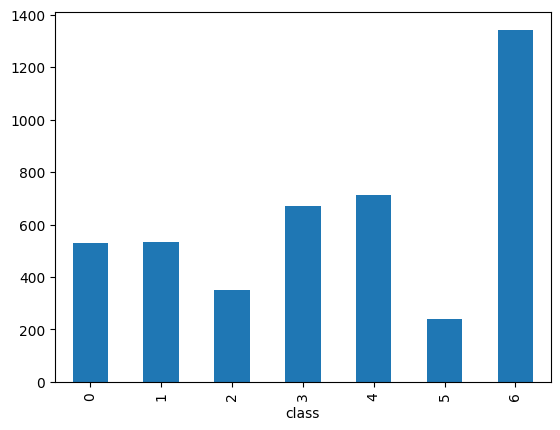

In [ ]:
human_data['class'].value_counts().sort_index().plot.bar()

<Axes: xlabel='class'>

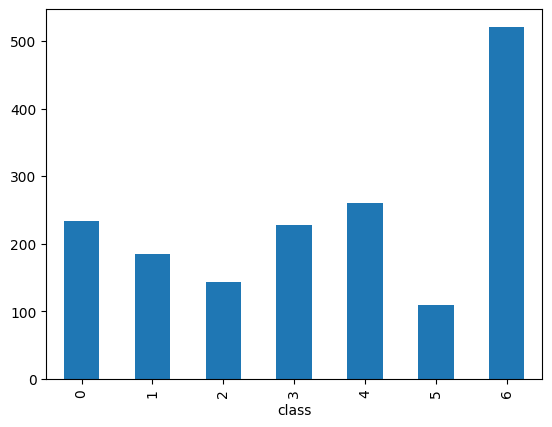

In [ ]:
chimp_data['class'].value_counts().sort_index().plot.bar()

<Axes: xlabel='class'>

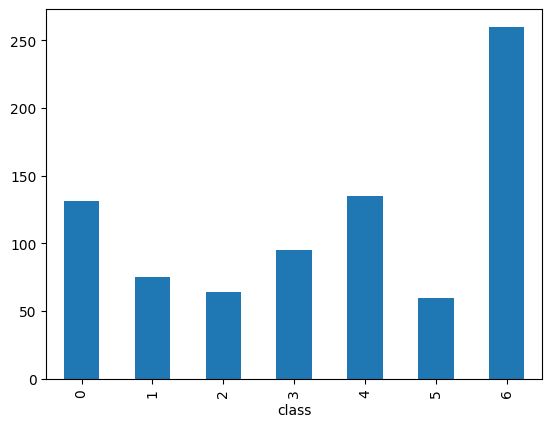

In [ ]:
dog_data['class'].value_counts().sort_index().plot.bar()

<Axes: xlabel='class'>

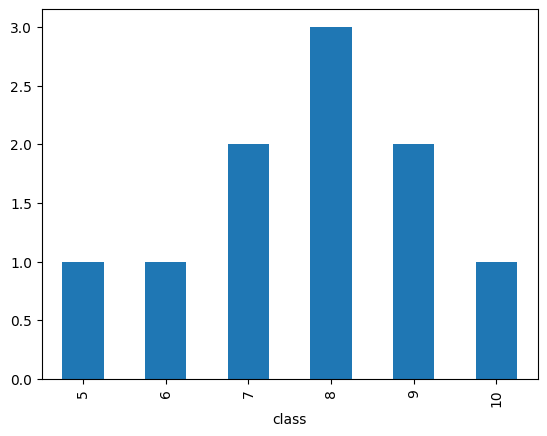

In [ ]:
lizard_data['class'].value_counts().sort_index().plot.bar()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y_data,test_size = 0.20,random_state=42)

In [ ]:
print(X_train.shape)
print(X_test.shape)

(3504, 232414)
(876, 232414)


In [ ]:
from sklearn.model_selection import train_test_split

X_chimp_train, X_chimp_test, y_chimp_train, y_chimp_test = train_test_split(Z_chimp,y_chimp,test_size = 0.20,random_state=42)

X_dog_train, X_dog_test, y_dog_train, y_dog_test = train_test_split(Z_dog,y_dog,test_size = 0.20,random_state=42)

X_lizard_train, X_lizard_test, y_lizard_train, y_lizard_test = train_test_split(Z_lizard,y_lizard,test_size = 0.20,random_state=42)

In [ ]:
print(X_chimp_train.shape)
print(X_chimp_test.shape)


print(X_dog_train.shape)
print(X_dog_test.shape)


print(X_lizard_train.shape)
print(X_lizard_test.shape)

(1345, 232414)
(337, 232414)
(656, 232414)
(164, 232414)
(8, 232414)
(2, 232414)


In [ ]:
#multinomial naive bayes model

In [ ]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB(alpha=0.1)
classifier.fit(X_train, y_train)

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
print("Confusion matrix\n")
print(pd.crosstab(pd.Series(y_test, name='Actual'), pd.Series(y_pred, name='Predicted')))
def get_metrics(y_test, y_predicted):
    accuracy = accuracy_score(y_test, y_predicted)
    precision = precision_score(y_test, y_predicted, average='weighted')
    recall = recall_score(y_test, y_predicted, average='weighted')
    f1 = f1_score(y_test, y_predicted, average='weighted')
    return accuracy, precision, recall, f1
accuracy, precision, recall, f1 = get_metrics(y_test, y_pred)
print("accuracy = %.3f \nprecision = %.3f \nrecall = %.3f \nf1 = %.3f" % (accuracy, precision, recall, f1))

Confusion matrix

Predicted   0    1   2    3    4   5    6
Actual                                   
0          99    0   0    0    1   0    2
1           0  104   0    0    0   0    2
2           0    0  78    0    0   0    0
3           0    0   0  124    0   0    1
4           1    0   0    0  143   0    5
5           0    0   0    0    0  51    0
6           1    0   0    1    0   0  263
accuracy = 0.984 
precision = 0.984 
recall = 0.984 
f1 = 0.984


In [ ]:
classifier = MultinomialNB(alpha=0.1)
classifier.fit(X_chimp_train, y_chimp_train)
y_chimp_pred = classifier.predict(X_chimp_test)

In [ ]:
print("Confusion matrix\n")
print(pd.crosstab(pd.Series(y_chimp_test, name='Actual'), pd.Series(y_chimp_pred, name='Predicted')))
def get_metrics(y_test, y_predicted):
    accuracy = accuracy_score(y_test, y_predicted)
    precision = precision_score(y_test, y_predicted, average='weighted')
    recall = recall_score(y_test, y_predicted, average='weighted')
    f1 = f1_score(y_test, y_predicted, average='weighted')
    return accuracy, precision, recall, f1
accuracy, precision, recall, f1 = get_metrics(y_test, y_pred)
print("accuracy = %.3f \nprecision = %.3f \nrecall = %.3f \nf1 = %.3f" % (accuracy, precision, recall, f1))

Confusion matrix

Predicted   0   1   2   3   4   5    6
Actual                                
0          27   0   0   0   0   0    1
1           0  38   0   0   0   0    1
2           0   0  25   0   0   0    2
3           0   0   0  41   0   0    2
4           2   1   0   3  40   0    6
5           3   0   0   0   3  19    4
6           0   0   0   1   0   0  118
accuracy = 0.984 
precision = 0.984 
recall = 0.984 
f1 = 0.984


In [ ]:
classifier = MultinomialNB(alpha=0.1)
classifier.fit(X_dog_train, y_dog_train)
y_dog_pred = classifier.predict(X_dog_test)

In [ ]:
print("Confusion matrix\n")
print(pd.crosstab(pd.Series(y_dog_test, name='Actual'), pd.Series(y_dog_pred, name='Predicted')))
def get_metrics(y_test, y_predicted):
    accuracy = accuracy_score(y_test, y_predicted)
    precision = precision_score(y_test, y_predicted, average='weighted')
    recall = recall_score(y_test, y_predicted, average='weighted')
    f1 = f1_score(y_test, y_predicted, average='weighted')
    return accuracy, precision, recall, f1
accuracy, precision, recall, f1 = get_metrics(y_test, y_pred)
print("accuracy = %.3f \nprecision = %.3f \nrecall = %.3f \nf1 = %.3f" % (accuracy, precision, recall, f1))

Confusion matrix

Predicted   0   1   2  3  4  5   6
Actual                            
0          21   0   0  0  0  0   6
1           3  10   0  0  0  0   6
2           1   0  10  0  0  0   3
3           1   0   0  8  0  0   7
4           3   0   0  2  8  0  10
5           2   0   0  1  0  5   5
6           0   0   0  1  0  0  51
accuracy = 0.984 
precision = 0.984 
recall = 0.984 
f1 = 0.984


In [ ]:
#support vetor machines

In [ ]:
from sklearn.svm import SVC

In [ ]:
classifier = SVC(kernel='linear', C=1.0)
classifier.fit(X_train, y_train)


In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
print("Confusion matrix\n")
print(pd.crosstab(pd.Series(y_test, name='Actual'), pd.Series(y_pred, name='Predicted')))

def get_metrics(y_test, y_predicted):
    accuracy = accuracy_score(y_test, y_predicted)
    precision = precision_score(y_test, y_predicted, average='weighted')
    recall = recall_score(y_test, y_predicted, average='weighted')
    f1 = f1_score(y_test, y_predicted, average='weighted')
    return accuracy, precision, recall, f1
accuracy, precision, recall, f1 = get_metrics(y_test, y_pred)
print("accuracy = %.3f \nprecision = %.3f \nrecall = %.3f \nf1 = %.3f" % (accuracy, precision, recall, f1))

Confusion matrix

Predicted   0   1   2    3    4   5    6
Actual                                  
0          86   1   0    2    3   0   10
1           0  95   0    1    0   0   10
2           0   1  68    2    0   0    7
3           0   0   0  114    1   0   10
4           1   0   0    1  130   0   17
5           0   0   0    0    0  42    9
6           0   0   0    0    0   0  265
accuracy = 0.913 
precision = 0.926 
recall = 0.913 
f1 = 0.914


In [ ]:
classifier = SVC(kernel='linear', C=1.0)
classifier.fit(X_chimp_train, y_chimp_train)
y_chimp_pred = classifier.predict(X_chimp_test)

print("Confusion matrix\n")
print(pd.crosstab(pd.Series(y_chimp_test, name='Actual'), pd.Series(y_chimp_pred, name='Predicted')))

def get_metrics(y_test, y_predicted):
    accuracy = accuracy_score(y_test, y_predicted)
    precision = precision_score(y_test, y_predicted, average='weighted')
    recall = recall_score(y_test, y_predicted, average='weighted')
    f1 = f1_score(y_test, y_predicted, average='weighted')
    return accuracy, precision, recall, f1
accuracy, precision, recall, f1 = get_metrics(y_test, y_pred)
print("accuracy = %.3f \nprecision = %.3f \nrecall = %.3f \nf1 = %.3f" % (accuracy, precision, recall, f1))

Confusion matrix

Predicted   0   1   2   3   4   5    6
Actual                                
0          21   0   0   0   1   0    6
1           0  34   0   0   0   0    5
2           0   0  24   0   0   0    3
3           0   0   0  38   0   0    5
4           0   0   0   0  40   0   12
5           3   0   0   0   0  18    8
6           0   0   0   0   0   0  119
accuracy = 0.913 
precision = 0.926 
recall = 0.913 
f1 = 0.914


In [ ]:
classifier = SVC(kernel='linear', C=1.0)
classifier.fit(X_dog_train, y_dog_train)
y_dog_pred = classifier.predict(X_dog_test)

print("Confusion matrix\n")
print(pd.crosstab(pd.Series(y_dog_test, name='Actual'), pd.Series(y_dog_pred, name='Predicted')))

def get_metrics(y_test, y_predicted):
    accuracy = accuracy_score(y_test, y_predicted)
    precision = precision_score(y_test, y_predicted, average='weighted')
    recall = recall_score(y_test, y_predicted, average='weighted')
    f1 = f1_score(y_test, y_predicted, average='weighted')
    return accuracy, precision, recall, f1
accuracy, precision, recall, f1 = get_metrics(y_test, y_pred)
print("accuracy = %.3f \nprecision = %.3f \nrecall = %.3f \nf1 = %.3f" % (accuracy, precision, recall, f1))

Confusion matrix

Predicted  0  1   2  3  4  5   6
Actual                          
0          6  0   0  0  1  0  20
1          1  7   0  2  0  0   9
2          0  0  10  0  0  0   4
3          2  0   0  4  0  0  10
4          1  0   0  1  7  0  14
5          3  0   0  0  0  5   5
6          0  0   0  0  0  0  52
accuracy = 0.913 
precision = 0.926 
recall = 0.913 
f1 = 0.914


In [ ]:
#Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
classifier = RandomForestClassifier(n_estimators=100, random_state=42)
classifier.fit(X_train, y_train)

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
print("Confusion matrix\n")
print(pd.crosstab(pd.Series(y_test, name='Actual'), pd.Series(y_pred, name='Predicted')))
def get_metrics(y_test, y_predicted):
    accuracy = accuracy_score(y_test, y_predicted)
    precision = precision_score(y_test, y_predicted, average='weighted')
    recall = recall_score(y_test, y_predicted, average='weighted')
    f1 = f1_score(y_test, y_predicted, average='weighted')
    return accuracy, precision, recall, f1
accuracy, precision, recall, f1 = get_metrics(y_test, y_pred)
print("accuracy = %.3f \nprecision = %.3f \nrecall = %.3f \nf1 = %.3f" % (accuracy, precision, recall, f1))

Confusion matrix

Predicted   0   1   2    3    4   5    6
Actual                                  
0          95   1   0    2    1   0    3
1           3  95   0    3    1   0    4
2           1   0  71    1    0   0    5
3           1   0   0  119    0   0    5
4           7   0   0    3  133   0    6
5           3   0   0    3    0  41    4
6          11   0   0    1    0   0  253
accuracy = 0.921 
precision = 0.928 
recall = 0.921 
f1 = 0.922


In [ ]:
classifier = RandomForestClassifier(n_estimators=100, random_state=42)
classifier.fit(X_chimp_train, y_chimp_train)
y_chimp_pred = classifier.predict(X_chimp_test)

print("Confusion matrix\n")
print(pd.crosstab(pd.Series(y_chimp_test, name='Actual'), pd.Series(y_chimp_pred, name='Predicted')))

def get_metrics(y_test, y_predicted):
    accuracy = accuracy_score(y_test, y_predicted)
    precision = precision_score(y_test, y_predicted, average='weighted')
    recall = recall_score(y_test, y_predicted, average='weighted')
    f1 = f1_score(y_test, y_predicted, average='weighted')
    return accuracy, precision, recall, f1
accuracy, precision, recall, f1 = get_metrics(y_test, y_pred)
print("accuracy = %.3f \nprecision = %.3f \nrecall = %.3f \nf1 = %.3f" % (accuracy, precision, recall, f1))

Confusion matrix

Predicted   0   1   2   3   4   5    6
Actual                                
0          20   0   0   0   0   0    8
1           0  33   0   0   0   0    6
2           0   0  27   0   0   0    0
3           0   0   0  36   0   0    7
4           1   0   0   0  34   0   17
5           4   0   0   0   0  18    7
6           0   0   0   0   0   0  119
accuracy = 0.921 
precision = 0.928 
recall = 0.921 
f1 = 0.922


In [ ]:
classifier = RandomForestClassifier(n_estimators=100, random_state=42)
classifier.fit(X_dog_train, y_dog_train)
y_dog_pred = classifier.predict(X_dog_test)
print("Confusion matrix\n")
print(pd.crosstab(pd.Series(y_dog_test, name='Actual'), pd.Series(y_dog_pred, name='Predicted')))

def get_metrics(y_test, y_predicted):
    accuracy = accuracy_score(y_test, y_predicted)
    precision = precision_score(y_test, y_predicted, average='weighted')
    recall = recall_score(y_test, y_predicted, average='weighted')
    f1 = f1_score(y_test, y_predicted, average='weighted')
    return accuracy, precision, recall, f1
accuracy, precision, recall, f1 = get_metrics(y_test, y_pred)
print("accuracy = %.3f \nprecision = %.3f \nrecall = %.3f \nf1 = %.3f" % (accuracy, precision, recall, f1))

Confusion matrix

Predicted  0  1   2  3  4  5   6
Actual                          
0          6  0   0  0  1  0  20
1          2  8   0  0  1  0   8
2          0  0  11  0  0  0   3
3          0  0   0  6  0  0  10
4          1  0   0  0  8  0  14
5          3  0   0  0  1  5   4
6          0  0   0  0  1  0  51
accuracy = 0.921 
precision = 0.928 
recall = 0.921 
f1 = 0.922
